# 3Lines Investment Sucess Exploration

## Exploratory Data Analysis (EDA)

### Data Prep

In [67]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
# load the dataset
df = pd.read_excel('Decisions_Data.xlsx')
# display the first few rows of the dataset
df.head()

,Intial Investment Year,Relevant Year,Would You Invest Now?,Exit Status,Var1,Var2,History of Bold Entrepreneurs,Alignment of interests among the team?,Var3,Serial Entreprenuer?,...,Is valuation reasonable?,Are there acquisitions happening in the industry?,Indirect business model linked to Impact or ESG,Require substantial growth support after investment,Hardware or manufacturing?,Is lead investor aligned?,Is customer churn low?,Is the pricing power strong?,Yearly Revenue Growth Rate,Yearly Valuation Rate
0,2013,2020,NO,Exited,1.0,1.0,1,1,1,1,...,0,1,0,1,0,0,1,0,0.142857,0.142857
1,2014,2025,NO,Operational,5.0,1.0,0,1,0,1,...,1,1,0,0,0,1,0,0,0.454545,0.090909
2,2014,2025,YES,Operational,30.0,30.0,1,1,0,0,...,1,1,0,0,0,1,1,1,2.727273,2.727273
3,2014,2025,NO,Operational,2.0,5.0,1,0,0,0,...,1,0,0,0,0,0,0,0,0.181818,0.454545
4,2014,2018,NO,Dissolved,0.0,0.0,0,0,0,0,...,1,1,0,1,0,0,0,0,0.000000,0.000000


### Data Shape and Basic Statistics

In [69]:
# get the shape of the dataset
df.shape

(135, 27)

In [70]:
# understand the data types of the columns and check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 27 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Intial Investment Year                               135 non-null    int64  
 1   Relevant Year                                        135 non-null    int64  
 2   Would You Invest Now?                                135 non-null    object 
 3   Exit Status                                          135 non-null    object 
 4   Var1                                                 135 non-null    float64
 5   Var2                                                 135 non-null    float64
 6   History of Bold Entrepreneurs                        135 non-null    int64  
 7   Alignment of interests among the team?               135 non-null    int64  
 8   Var3                                                 135 non-null    i

**Note:** In this modified data set, we have 27 explanatory variables that describe 135 start-ups. A lot of the explanatory variables are numerical or have been pre-encoded. Some variable names have been replaced with placeholder names to ensure data privacy some categorical variables have been left untouched to demonstrate encoding techniques and approaches later in this notebook.

In [71]:
# get summary statistics of the categorical columns
df.describe(include=[object]).T

,count,unique,top,freq
Would You Invest Now?,135,3,NO,78
Exit Status,135,4,Operational,93
Value Prop,135,3,low,48
Customer adoption and engagement probability,135,3,low,81


**Note:** In this initial summary here we can see basic statistics of the categorical varaibles in the data. For example, `Would You Invest Now?` is most frequently `NO`, out $3$ possible categories.

In [72]:
# sumarry statistics of the numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Intial Investment Year,135.0,2018.777778,3.036265,2013.0,2017.000000,2018.000,2021.0,2025.000000
Relevant Year,135.0,2023.933333,1.932441,2018.0,2024.000000,2025.000,2025.0,2025.000000
Var1,135.0,12.389111,23.580939,0.0,1.000000,2.000,6.7,80.000000
Var2,135.0,5.289333,11.098948,0.0,1.000000,1.000,2.8,40.000000
History of Bold Entrepreneurs,135.0,0.622222,0.486637,0.0,0.000000,1.000,1.0,1.000000
Alignment of interests among the team?,135.0,0.555556,0.498755,0.0,0.000000,1.000,1.0,1.000000
Var3,135.0,0.333333,0.473160,0.0,0.000000,0.000,1.0,1.000000
Serial Entreprenuer?,135.0,0.377778,0.486637,0.0,0.000000,0.000,1.0,1.000000
Var4,135.0,0.355556,0.480464,0.0,0.000000,0.000,1.0,1.000000
Is the market big enough?,135.0,0.555556,0.498755,0.0,0.000000,1.000,1.0,1.000000


**Note:** We can see some initial statistics from this summary that describe the distritbutions of the variables in the data. So we can handle missing values and then move onto visualizations to find relevant patterns in the data.

In [73]:
# replacing any missing values with the median of the column
df['Yearly Revenue Growth Rate'].fillna(df['Yearly Revenue Growth Rate'].median(), inplace=True)
df['Yearly Valuation Rate'].fillna(df['Yearly Valuation Rate'].median(), inplace=True)
# print the number of missing values in the columns
df['Yearly Revenue Growth Rate'].isnull().sum(), df['Yearly Valuation Rate'].isnull().sum()

(0, 0)

**Note:** We imputed missing values in the yearly rate columns with their respective medians so that we don't lose any relevant information by dropping the rows. We can also handle both columns for year by combining them into one column.

In [74]:
# create a new column "Years Since Investment" based on the "Relevant Year" and "Intial Investment Year"
df["Years Since Investment"] = df["Relevant Year"] - df["Intial Investment Year"]
# drop the columns "Relevant Year" and "Intial Investment Year"
df.drop(columns=["Relevant Year","Intial Investment Year"], axis=1, inplace=True)
# check that the columns have been dropped and the new column has been added
df.head()

,Would You Invest Now?,Exit Status,Var1,Var2,History of Bold Entrepreneurs,Alignment of interests among the team?,Var3,Serial Entreprenuer?,Var4,Value Prop,...,Are there acquisitions happening in the industry?,Indirect business model linked to Impact or ESG,Require substantial growth support after investment,Hardware or manufacturing?,Is lead investor aligned?,Is customer churn low?,Is the pricing power strong?,Yearly Revenue Growth Rate,Yearly Valuation Rate,Years Since Investment
0,NO,Exited,1.0,1.0,1,1,1,1,1,med,...,1,0,1,0,0,1,0,0.142857,0.142857,7
1,NO,Operational,5.0,1.0,0,1,0,1,0,low,...,1,0,0,0,1,0,0,0.454545,0.090909,11
2,YES,Operational,30.0,30.0,1,1,0,0,0,high,...,1,0,0,0,1,1,1,2.727273,2.727273,11
3,NO,Operational,2.0,5.0,1,0,0,0,0,low,...,0,0,0,0,0,0,0,0.181818,0.454545,11
4,NO,Dissolved,0.0,0.0,0,0,0,0,0,med,...,1,0,1,0,0,0,0,0.000000,0.000000,4


### Visualizations

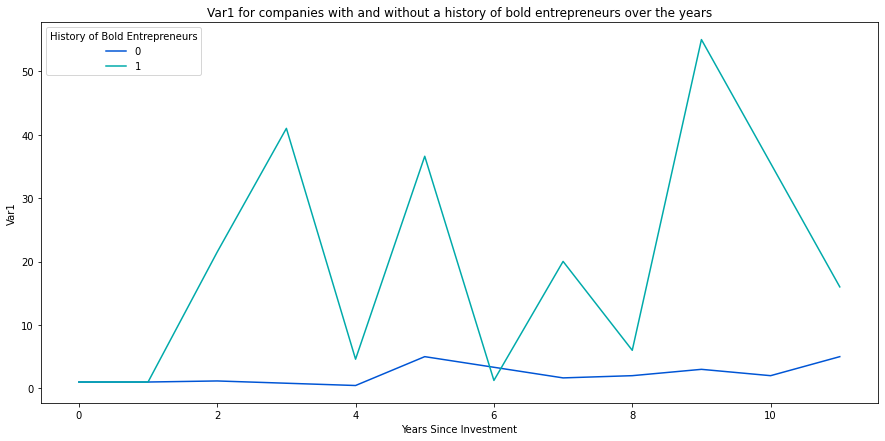

In [75]:
# set figure size
plt.figure(figsize=(15, 7))
# create a line plot for "Var1" over the years
sns.lineplot(data=df, x="Years Since Investment", y="Var1", hue="History of Bold Entrepreneurs", palette="winter", errorbar=None)
# set the title
plt.title("Var1 for companies with and without a history of bold entrepreneurs over the years")
# save the plot as a PNG file
plt.savefig("Var1-bold-entrepreneurship.png")
# display the plot
plt.show()

**Note:** Teams with a history for bold entrepreneurship have higher values for `Var1` over the years than those without.

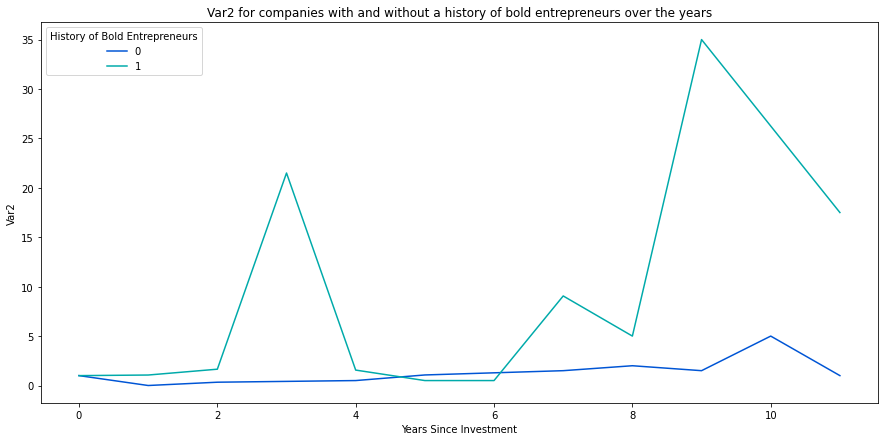

In [76]:
# set figure size
plt.figure(figsize=(15, 7))
# create a line plot for "Var1" over the years
sns.lineplot(data=df, x="Years Since Investment", y="Var2", hue="History of Bold Entrepreneurs", palette="winter", errorbar=None)
# set the title
plt.title("Var2 for companies with and without a history of bold entrepreneurs over the years")
# save the plot as a PNG file
plt.savefig("Var2-bold-entrepreneurship.png")
# display the plot
plt.show()

**Note:** Teams with a history for bold entrepreneurship have a more volatile relationship with `Var2` over the years than those without — who have a steadily low value for `Var2`.

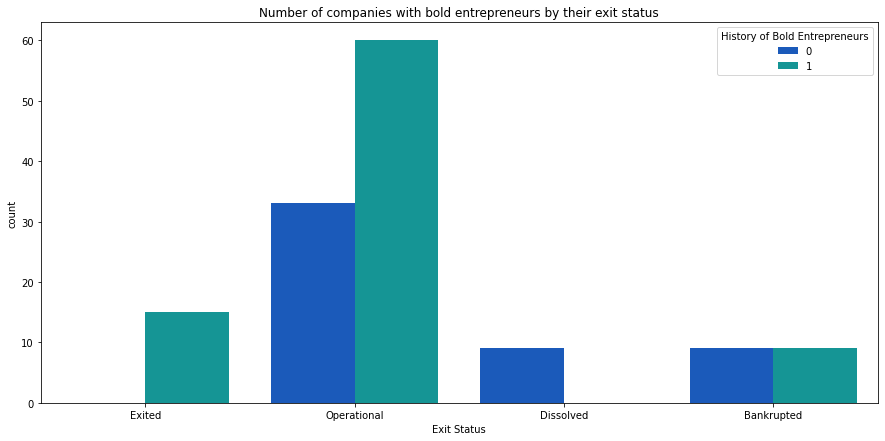

In [77]:
# set the figure size
plt.figure(figsize=(15, 7))
# create a count plot for "Exit Status" by "History of Bold Entrepreneurs"
sns.countplot(data=df, x="Exit Status", hue="History of Bold Entrepreneurs", palette="winter")
# set the title
plt.title("Number of companies with bold entrepreneurs by their exit status")
# save the plot as a PNG file
plt.savefig("exit_status_bold_entrepreneur.png")
# display the plot
plt.show()

**Note:**
- The companies that have exited or are still operational, overwhelmingly are historically bold entrepreneurs.
- Companies that have dissolved, overwhelmingly are *not* historically bold entrepreneurs.
- Companies that bankrupted are 50-50, which would be interesting to look into further.

### Correlation Matrix

**Note:** In order to visualize a correlation matrix for this data, we must first make sure all variables are numerically encoded. Below is some code showing that encoding.

In [78]:
# replace categorical values with numerical values
df['Would You Invest Now?'].replace('NO', 0, inplace=True)
df['Would You Invest Now?'].replace('MAYBE', 1, inplace=True)
df['Would You Invest Now?'].replace('YES', 2, inplace=True)
df['Would You Invest Now?'].replace('YES', 2, inplace=True)

In [79]:
# replace categorical values with numerical values
df['Exit Status'].replace('Bankrupted', 0, inplace=True)
df['Exit Status'].replace('Dissolved', 1, inplace=True)
df['Exit Status'].replace('Operational', 2, inplace=True)
df['Exit Status'].replace('Exited', 3, inplace=True)

In [80]:
# replace categorical values with numerical values
df['Value Prop'].replace('low', 0, inplace=True)
df['Value Prop'].replace('med', 1, inplace=True)
df['Value Prop'].replace('high', 2, inplace=True)

In [81]:
# replace categorical values with numerical values
df['Customer adoption and engagement probability'].replace('low', 0, inplace=True)
df['Customer adoption and engagement probability'].replace('med', 1, inplace=True)
df['Customer adoption and engagement probability'].replace('high', 2, inplace=True)

In [82]:
# check that the categorical values have been replaced with numerical values
df.head()

,Would You Invest Now?,Exit Status,Var1,Var2,History of Bold Entrepreneurs,Alignment of interests among the team?,Var3,Serial Entreprenuer?,Var4,Value Prop,...,Are there acquisitions happening in the industry?,Indirect business model linked to Impact or ESG,Require substantial growth support after investment,Hardware or manufacturing?,Is lead investor aligned?,Is customer churn low?,Is the pricing power strong?,Yearly Revenue Growth Rate,Yearly Valuation Rate,Years Since Investment
0,0,3,1.0,1.0,1,1,1,1,1,1,...,1,0,1,0,0,1,0,0.142857,0.142857,7
1,0,2,5.0,1.0,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0.454545,0.090909,11
2,2,2,30.0,30.0,1,1,0,0,0,2,...,1,0,0,0,1,1,1,2.727273,2.727273,11
3,0,2,2.0,5.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0.181818,0.454545,11
4,0,1,0.0,0.0,0,0,0,0,0,1,...,1,0,1,0,0,0,0,0.000000,0.000000,4


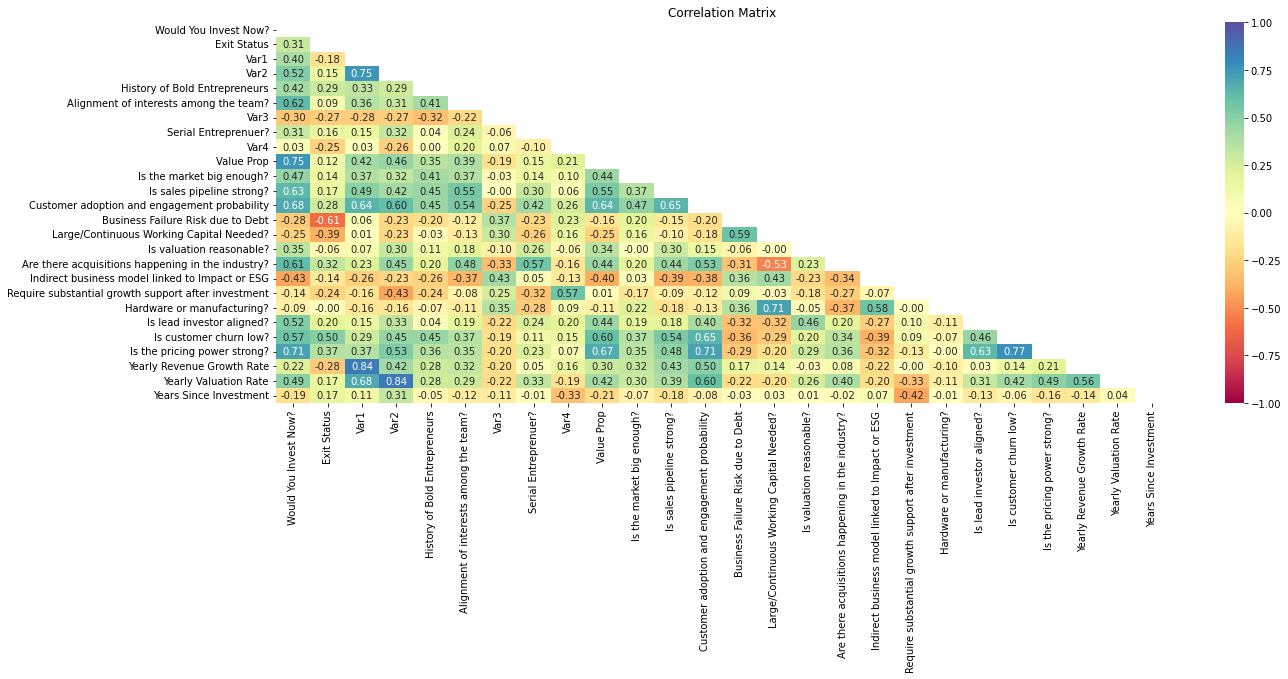

In [83]:
# set figure size
plt.figure(figsize=(20, 7))
# get the upper triangle of the correlation matrix
matrix = np.triu(df.corr())
# create a heatmap of the correlation matrix by masking the upper triangle
sns.heatmap(df.corr(), mask=matrix, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
# set the title
plt.title("Correlation Matrix")
# save the plot as a PNG file
plt.savefig("correlation_matrix.png", bbox_inches='tight', facecolor='white')
# display the plot
plt.show()

**Note:** We can see that there are some strong correlations in this data worth noting. Some are listed below:
- Yearly Revenue Growth Rate vs. Var1
- Yearly Valuation Rate vs. Var2
- Is customer churn low? vs. Is pricing power strong?
- Var1 vs Var2
- Hardware or manufacturing? vs. Large/Continuous Working Capital Needed?
- Business Failure Risk due to Debt vs. Exit Status

## Multiple Regression

**Note:** Based on the correlation matrix above, I thought it would be interesting to start with a multiple regression model and see how much these variables can infuence our prediction variable. For that we need to alter column names and create a formula for our multiple regression model.

In [84]:
# Replace spaces and special characters in column names with underscores
df.columns = [col.replace(' ', '_').replace('?', '').replace('/', '_') for col in df.columns]
# check the updated column names
df.columns

Index(['Would_You_Invest_Now', 'Exit_Status', 'Var1', 'Var2',
       'History_of_Bold_Entrepreneurs',
       'Alignment_of_interests_among_the_team', 'Var3', 'Serial_Entreprenuer',
       'Var4', 'Value_Prop', 'Is_the_market_big_enough',
       'Is_sales_pipeline_strong',
       'Customer_adoption_and_engagement_probability',
       'Business_Failure_Risk_due_to_Debt',
       'Large_Continuous_Working_Capital_Needed', 'Is_valuation_reasonable',
       'Are_there_acquisitions_happening_in_the_industry',
       'Indirect_business_model_linked_to_Impact_or_ESG',
       'Require_substantial_growth_support_after_investment',
       'Hardware_or_manufacturing', 'Is_lead_investor_aligned',
       'Is_customer_churn_low', 'Is_the_pricing_power_strong',
       'Yearly_Revenue_Growth_Rate', 'Yearly_Valuation_Rate',
       'Years_Since_Investment'],
      dtype='object')

In [85]:
# ensure all columns are numerical
df.dtypes

Would_You_Invest_Now                                     int64
Exit_Status                                              int64
Var1                                                   float64
Var2                                                   float64
History_of_Bold_Entrepreneurs                            int64
Alignment_of_interests_among_the_team                    int64
Var3                                                     int64
Serial_Entreprenuer                                      int64
Var4                                                     int64
Value_Prop                                               int64
Is_the_market_big_enough                                 int64
Is_sales_pipeline_strong                                 int64
Customer_adoption_and_engagement_probability             int64
Business_Failure_Risk_due_to_Debt                        int64
Large_Continuous_Working_Capital_Needed                  int64
Is_valuation_reasonable                                

In [86]:
# create a string of all columns except "Would_You_Invest_Now", joined by "+"
all_columns = "+".join(df.columns.difference(["Would_You_Invest_Now"]))

In [87]:
# import the statsmodels library for regression analysis
import statsmodels.formula.api as smf
# create a multiple regression model using the formula API
formula = "Would_You_Invest_Now ~" + all_columns
# fit the model to the data
model = smf.ols(formula, data=df).fit()
# print the summary of the model
print(model.summary())

                             OLS Regression Results                             
Dep. Variable:     Would_You_Invest_Now   R-squared:                       0.879
Model:                              OLS   Adj. R-squared:                  0.851
Method:                   Least Squares   F-statistic:                     31.54
Date:                  Sun, 11 May 2025   Prob (F-statistic):           6.85e-39
Time:                          17:55:54   Log-Likelihood:                -32.764
No. Observations:                   135   AIC:                             117.5
Df Residuals:                       109   BIC:                             193.1
Df Model:                            25                                         
Covariance Type:              nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

**Note:** For this model, we are using "Would_You_Invest_Now" as the variable to predict, which is the collected venture capital firms' true current assessment of their investment decisions. The R-squared and Adj. R-squared values are both above $0.8$, which is a promising start. Now I'd like to fine-tune this model by dropping some of the less influential variables. To assess which variables to drop, the graph below is great visualization tool.

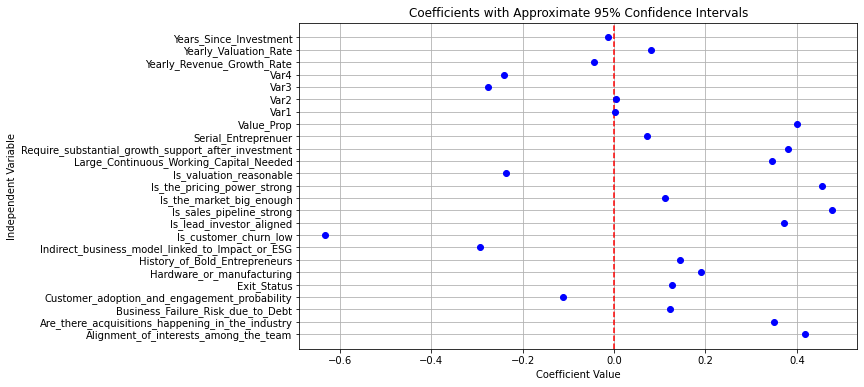

In [88]:
# create a dataframe to store the coefficients and standard errors of the variables
coef_df = pd.DataFrame({'Coefficient': model.params[1:], 'Standard Error': model.bse[1:], 'Variable': model.params.index[1:]})
# set the figure size
plt.figure(figsize=(10, 6))
# create a graph to visualize the coefficients and their confidence intervals
plt.errorbar(x=coef_df['Coefficient'], y=coef_df['Variable'], fmt='o', color='blue', capsize=5)
# create a vertical line at y=0 to indicate a coefficient of 0
plt.axvline(x=0, color='r', linestyle='--')
# set title and labels
plt.xlabel("Coefficient Value")
plt.ylabel("Independent Variable")
plt.title("Coefficients with Approximate 95% Confidence Intervals")
# show grid lines
plt.grid(True)
# save the plot as a PNG file
plt.savefig("coefficients-model1.png", bbox_inches='tight', facecolor='white')
# display the plot
plt.show()

**Note:** Variables with coefficients close to $0$, don't influence our predictor variable as much as others, so we can drop the following variables and run the model again:
- Var1
- Is_valuation_reasonable
- Yearly_valuation_rate
- Is_the_market_big_enough
- Var2

                             OLS Regression Results                             
Dep. Variable:     Would_You_Invest_Now   R-squared:                       0.854
Model:                              OLS   Adj. R-squared:                  0.829
Method:                   Least Squares   F-statistic:                     33.41
Date:                  Sun, 11 May 2025   Prob (F-statistic):           1.95e-38
Time:                          17:55:54   Log-Likelihood:                -45.069
No. Observations:                   135   AIC:                             132.1
Df Residuals:                       114   BIC:                             193.1
Df Model:                            20                                         
Covariance Type:              nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

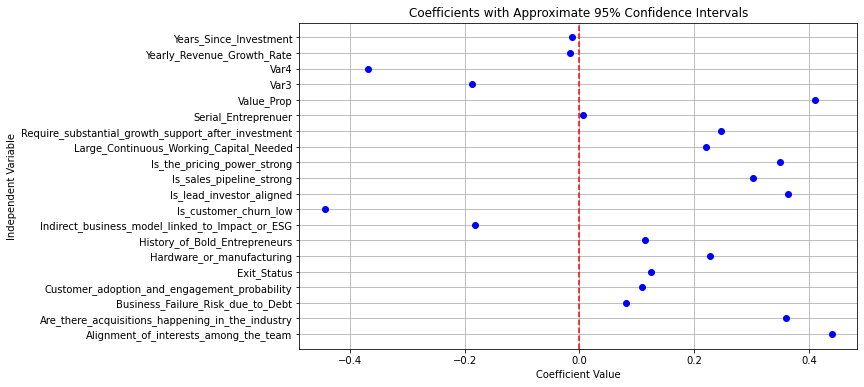

In [89]:
# create a string of all columns except "Would_You_Invest_Now", joined by "+"
all_columns = "+".join(df.columns.difference(["Would_You_Invest_Now", "Var1", "Is_valuation_reasonable", "Yearly_Valuation_Rate", "Is_the_market_big_enough", "Var2"]))
# create a multiple regression model using the formula API
formula = "Would_You_Invest_Now ~" + all_columns
# fit the model to the data
model = smf.ols(formula, data=df).fit()
# print the summary of the model
print(model.summary())

# create a dataframe to store the coefficients and standard errors of the variables
coef_df = pd.DataFrame({'Coefficient': model.params[1:], 'Standard Error': model.bse[1:], 'Variable': model.params.index[1:]})
# set the figure size
plt.figure(figsize=(10, 6))
# create a graph to visualize the coefficients and their confidence intervals
plt.errorbar(x=coef_df['Coefficient'], y=coef_df['Variable'], fmt='o', color='blue', capsize=5)
# create a vertical line at y=0 to indicate a coefficient of 0
plt.axvline(x=0, color='r', linestyle='--')
# set title and labels
plt.xlabel("Coefficient Value")
plt.ylabel("Independent Variable")
plt.title("Coefficients with Approximate 95% Confidence Intervals")
# show grid lines
plt.grid(True)
# save the plot as a PNG file
plt.savefig("coefficients-model2.png", bbox_inches='tight', facecolor='white')
# display the plot
plt.show()